We will use the human height data set:
https://docs.google.com/spreadsheets/d/e/2PACX-1vRxp-hsw61ck9cpt5ExZIUhvSGT5zYzoUJl_7xr7YF5qZeazC8393q2taqwkDvMxVirgFDJm1WX3uAC/pub?output=csv

Use the normal cumulative distribution function with the mean and standard deviation of female height to calculate the probability that a female's height is:

1. between 55.0 and 56.0 inches

2. is less than 5 feet (60 in)

3. is greater than the mean

In [118]:
# Import librairies
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import stats


In [82]:
## Load in Data
df = pd.read_csv('/content/weight-height male-female - weight-height.csv')
# display info and .head
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [83]:
# Explore the distribution of female heights
females = df.loc[ df['Gender'] == 'Female'].copy()
females.head()

,Gender,Height,Weight
5000,Female,58.910732,102.088326
5001,Female,65.230013,141.305823
5002,Female,63.369004,131.041403
5003,Female,64.479997,128.171511
5004,Female,61.793096,129.781407


In [84]:
data = females['Height']

In [85]:
mean = np.mean(data)
std = np.std(data)
min = np.min(data)
max = np.max(data)

In [86]:
# Mean and standard deviation for female height data
dist_stats = data.agg(['mean', 'std', 'min', 'max'])
dist_stats

mean    63.708774
std      2.696284
min     54.263133
max     73.389586
Name: Height, dtype: float64

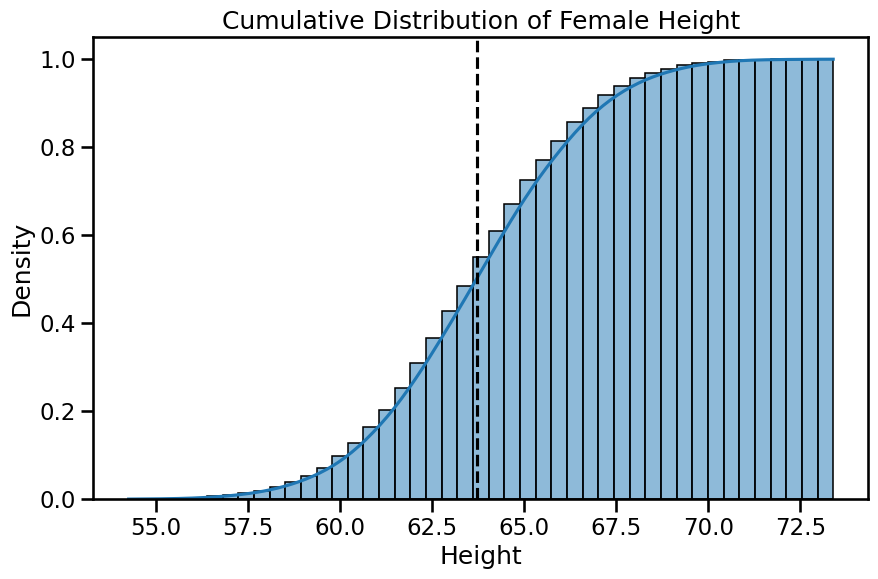

In [88]:
# Plot Cumulative Distribution of Female Height
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(x=data, stat='density', kde=True, cumulative=True)
ax.set_title('Cumulative Distribution of Female Height')
ax.axvline(mean, color='k',ls='--');

In [89]:
# Set the range and spacing for our normal curve
x_range = np.linspace(min, max,1000)

In [90]:
# Create the cdf for normal data with our mean and std
cdf = stats.norm.cdf(x_range, loc=mean, scale=std)

In [ ]:
lower1 = 55.0
higher1 = 56.0

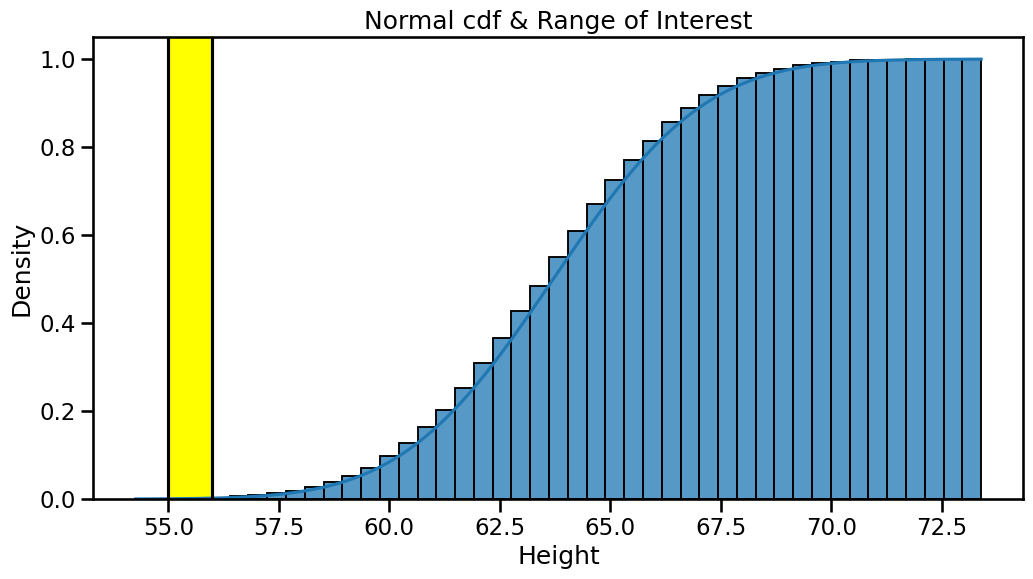

In [91]:
# Plot Normal cdf & Range of Interest
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range, cdf)
ax.set_title('Normal cdf & Range of Interest');
ax.axvline(lower1, color= 'black')
ax.axvline(higher1, color ='black')
ax.axvspan(lower1, higher1, color ='yellow', zorder = 0);

In [92]:
# 1. Probability that a female's height is between 55.0 and 56.0 inches
p1= stats.norm.cdf(higher1, loc=mean,scale=std) - stats.norm.cdf(lower1,loc=mean, scale=std)
p1

0.0015043054289559745

We found that there is a .0015 probability (or an 0.15% chance) of a female having a height between 55 and 56 inches.

In [107]:
lower2 = min
higher2 = 60

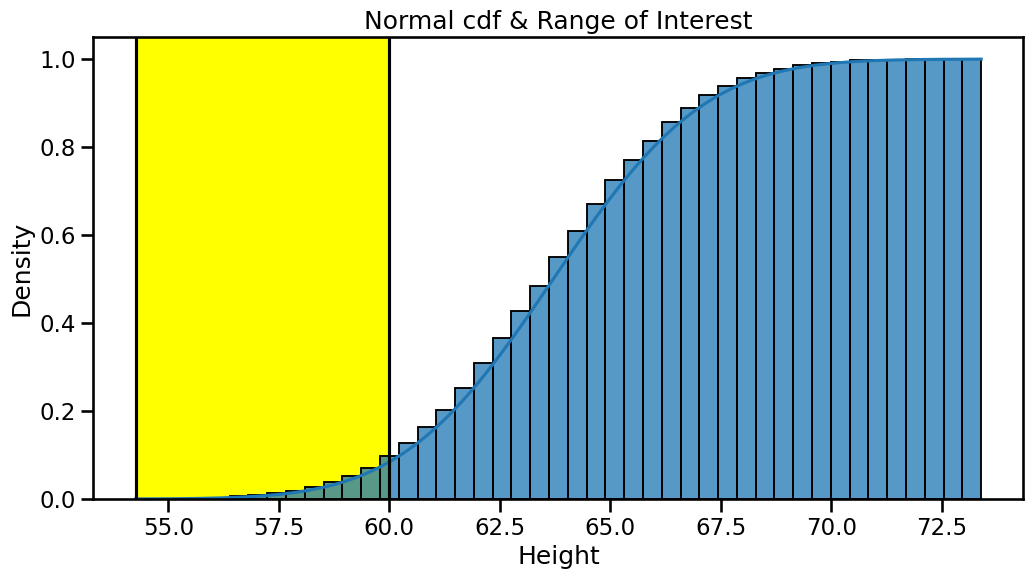

In [109]:
# Plot Normal cdf & Range of Interest
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range, cdf)
ax.set_title('Normal cdf & Range of Interest');
ax.axvline(lower2, color= 'black')
ax.axvline(higher2, color= 'black')
ax.axvspan(lower2, higher2, color ='yellow', zorder = 0);

In [110]:
# 2. Probability that a female's Height is less than 60 inches (5 feet)
p2= stats.norm.cdf(60, loc=mean, scale=std)
p2

0.0844649272520746

We found that there is a .084 probability (or an 8.4% chance) of a female having a height between 55 and 56 inches.

In [114]:
lower3=mean
higher3=max

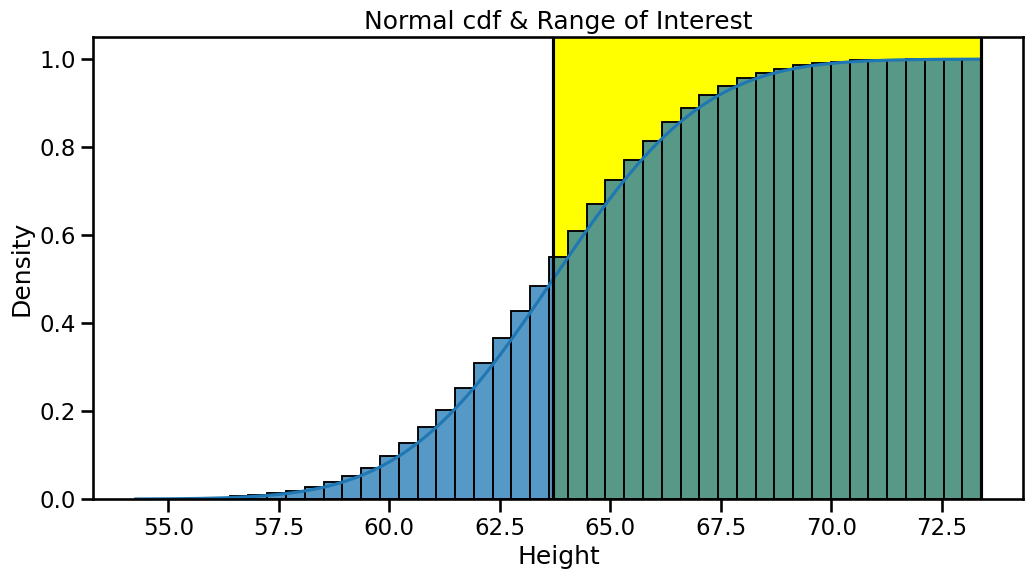

In [115]:
# Plot Normal cdf & Range of Interest
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(x=data, stat='density', cumulative = True)
ax.plot(x_range, cdf)
ax.set_title('Normal cdf & Range of Interest');
ax.axvline(lower3, color= 'black')
ax.axvline(higher3, color= 'black')
ax.axvspan(lower3, max, color ='yellow', zorder = 0);

In [116]:
# 3. Probability that a female's Height is greater than the mean inches
p3= 1 - stats.norm.cdf(mean, loc=mean, scale=std)
p3

0.5

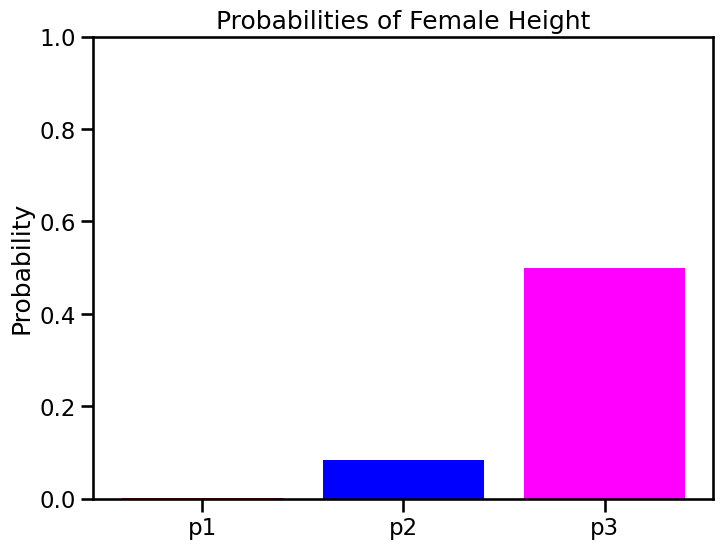

In [117]:
# Plot Probabilities of Female Height
labels = ['p1', 'p2', 'p3']
probabilities = [p1, p2, p3]

plt.figure(figsize=(8, 6))
plt.bar(labels, probabilities, color=['red', 'blue', 'magenta'])
plt.ylabel('Probability')
plt.title('Probabilities of Female Height')
# Set y-axis limit between 0 and 1 for probability values
plt.ylim(0, 1)
plt.show()